<a href="https://colab.research.google.com/github/NalaHam/07-02-2022/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# install and import

In [1]:
!pip install matplotlib==3.7.5
#==3.6.2

In [2]:
!pip install scanpy==1.10.1
!pip install pandas==2.2.2
!pip install numpy==1.26.4

In [3]:
!pip install setuptools==65.5.0 wheel==0.38.4

In [4]:
!pip install POT

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 21.5 MB/s eta 0:00:00


In [5]:
!pip install anndata

In [6]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.8 MB/s eta 0:00:00


In [7]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import anndata as ad

/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/usr

# Actual code

In [9]:
dat1 = sc.read_h5ad('L5_Dataset1_v2.h5ad')

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [10]:
dat2 = sc.read_h5ad('L5_Dataset2_v2.h5ad')

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [11]:
dat1.var_names_make_unique()

In [13]:
dat1

AnnData object with n_obs × n_vars = 2335 × 29577
    var: 'ENSG_ID'

In [12]:
dat2.var_names_make_unique()

In [14]:
dat2

AnnData object with n_obs × n_vars = 2200 × 29577
    var: 'ENSG_ID'

In [15]:
dat_combo_inner = ad.concat([dat1, dat2], axis=0, join = 'inner', label = 'Dataset_ID', keys= ["dat1","dat2"])

In [16]:
dat = dat_combo_inner

# UMAP + Leiden

In [17]:
def normalization( dat_ct):
    """this function normalize the data so that each cell has the same
    number of total counts as the median value of the total counts among all cells.
    The data will also be log-like transformed
    Count values will also be transformed to z-scores for each gene"""
    sc.pp.normalize_total(dat_ct)
    dat_ct.X = np.arcsinh(dat_ct.X).copy()
    dat_ct.layers['arcsinh'] = dat_ct.X.copy()
    sc.pp.scale(dat_ct)

    return dat_ct

In [18]:
dat.raw = dat.copy()

In [19]:
dat

AnnData object with n_obs × n_vars = 4535 × 29577
    obs: 'Dataset_ID'

In [20]:
normalization(dat)

AnnData object with n_obs × n_vars = 4535 × 29577
    obs: 'Dataset_ID'
    var: 'mean', 'std'
    layers: 'arcsinh'

In [21]:
n_neighbors = int( np.sqrt(dat.n_obs) )

In [22]:
sc.tl.pca(dat, return_info=False, use_highly_variable = False )

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


In [23]:
sc.pp.neighbors( dat, n_neighbors= n_neighbors , n_pcs=50, ) # make neighborhood graph

In [24]:
sc.tl.umap(dat, random_state=0) # make UMAP

In [25]:
sc.tl.leiden( dat, resolution = 0.7)

<ipython-input-25-9e0c34c5590b>:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden( dat, resolution = 0.7)


In [26]:
dat

AnnData object with n_obs × n_vars = 4535 × 29577
    obs: 'Dataset_ID', 'leiden'
    var: 'mean', 'std'
    uns: 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh'
    obsp: 'distances', 'connectivities'

In [27]:
sc.set_figure_params(figsize=[4,4], dpi = 150)

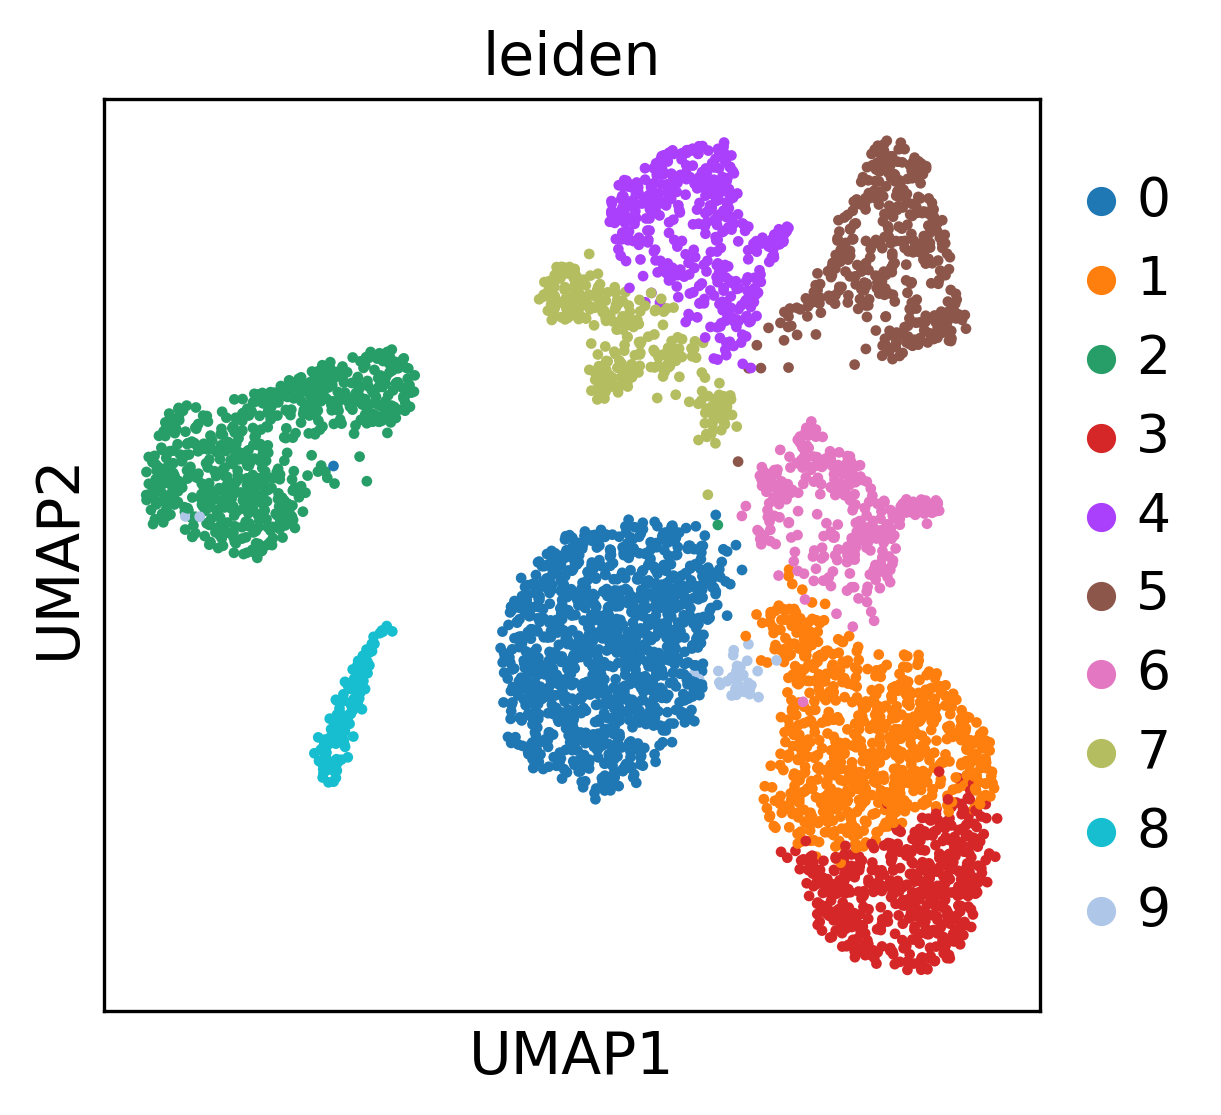

In [28]:
sc.pl.umap( dat, color = ['leiden'])

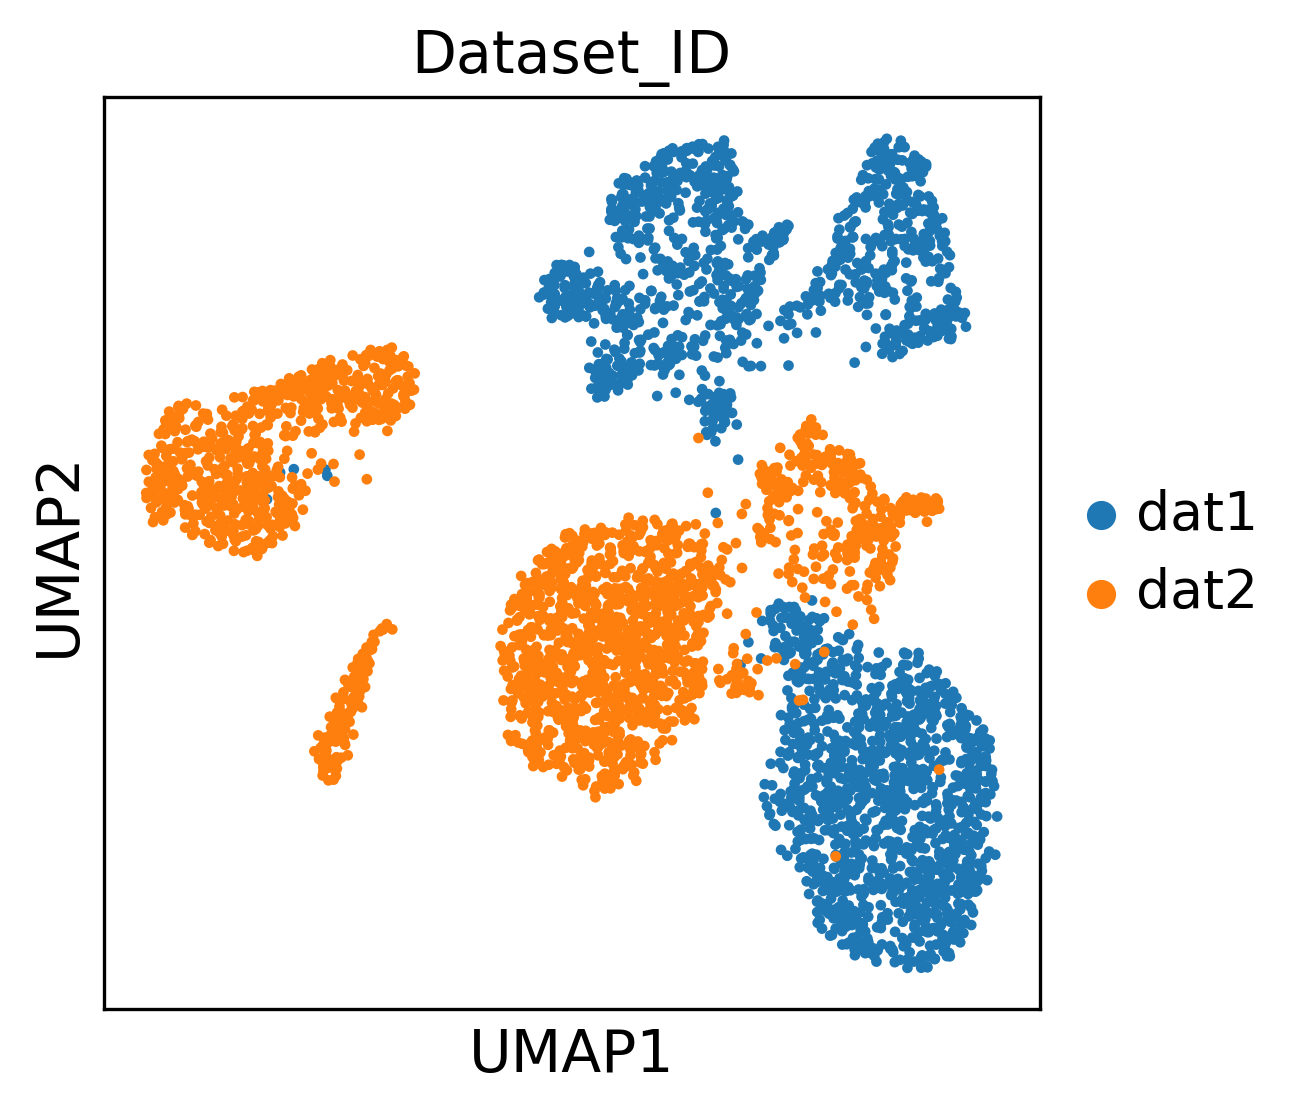

In [29]:
sc.pl.umap( dat, color = ['Dataset_ID'])

In [30]:
sc.tl.rank_genes_groups( dat, groupby='leiden', use_raw= False, layer='arcsinh', key_added='leiden_cluster', method= 'wilcoxon' )

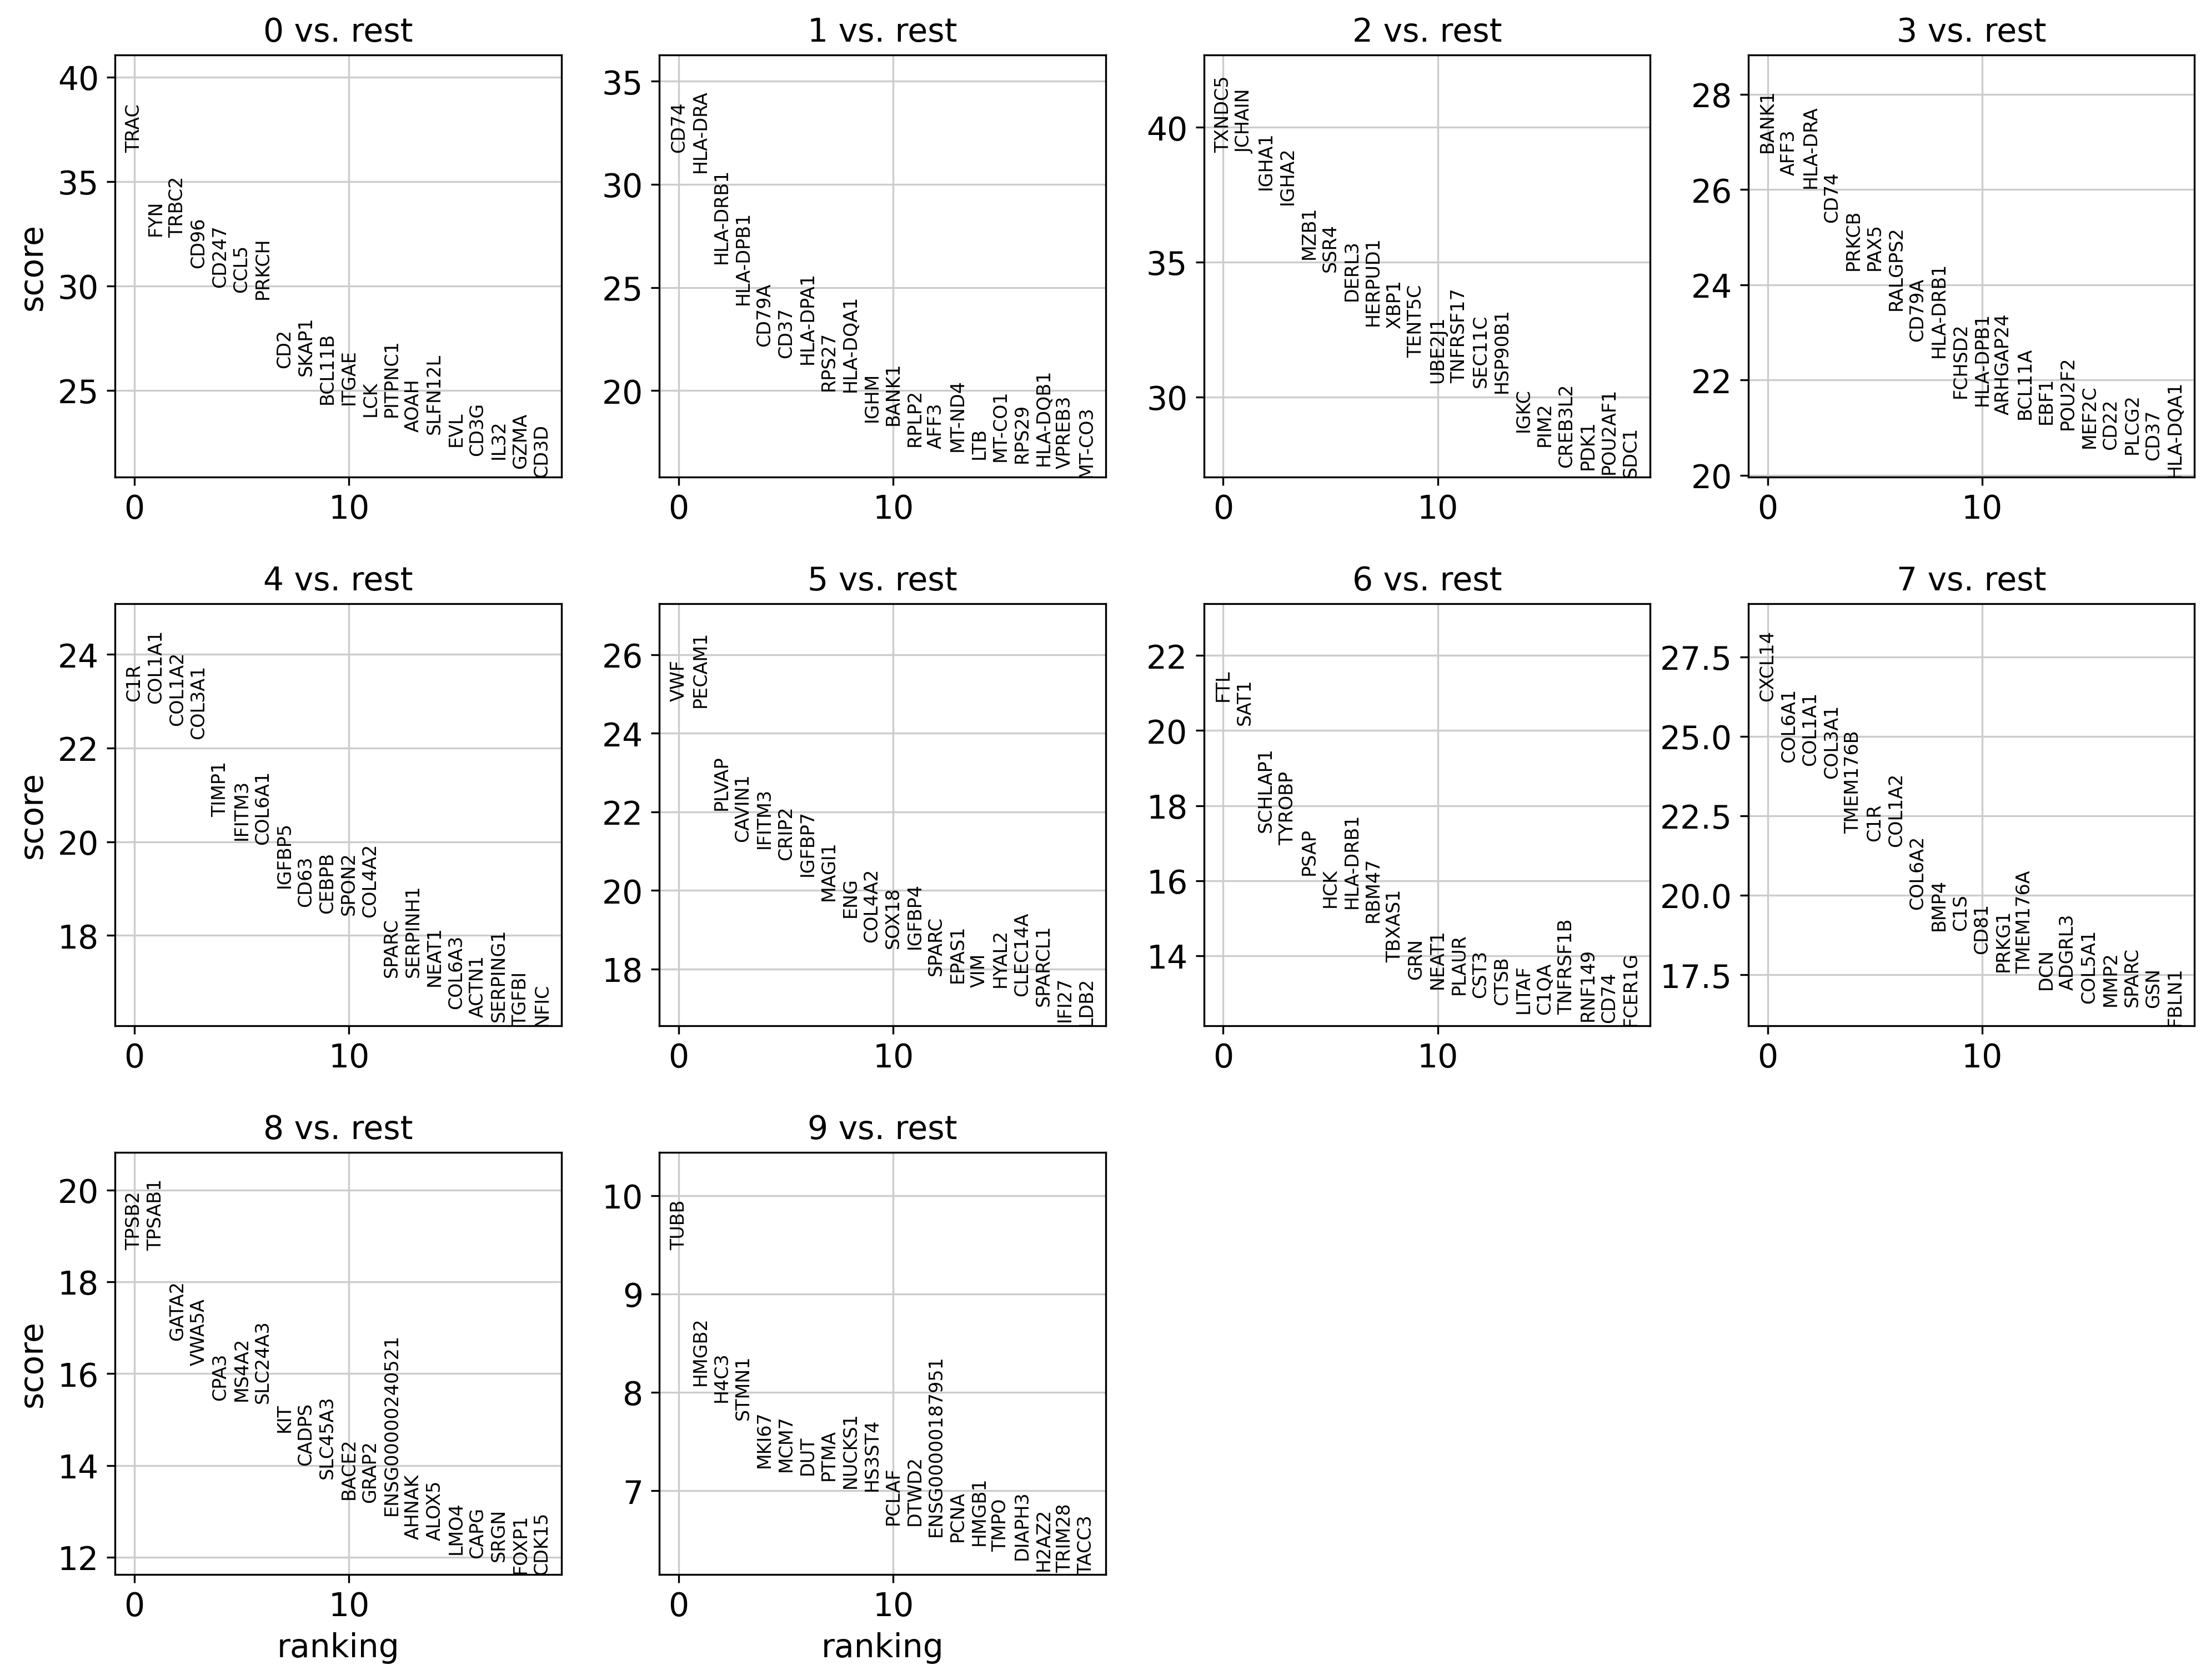

In [31]:
sc.pl.rank_genes_groups( dat, key='leiden_cluster', sharey= False )

In [34]:
sc.tl.marker_gene_overlap(dat)

TypeError: marker_gene_overlap() missing 1 required positional argument: 'reference_markers'

In [76]:
markers = ["CD79A", "CD8A", "COL1A1", "S100A8", "PECAM1", "KIT", "IRF4"]

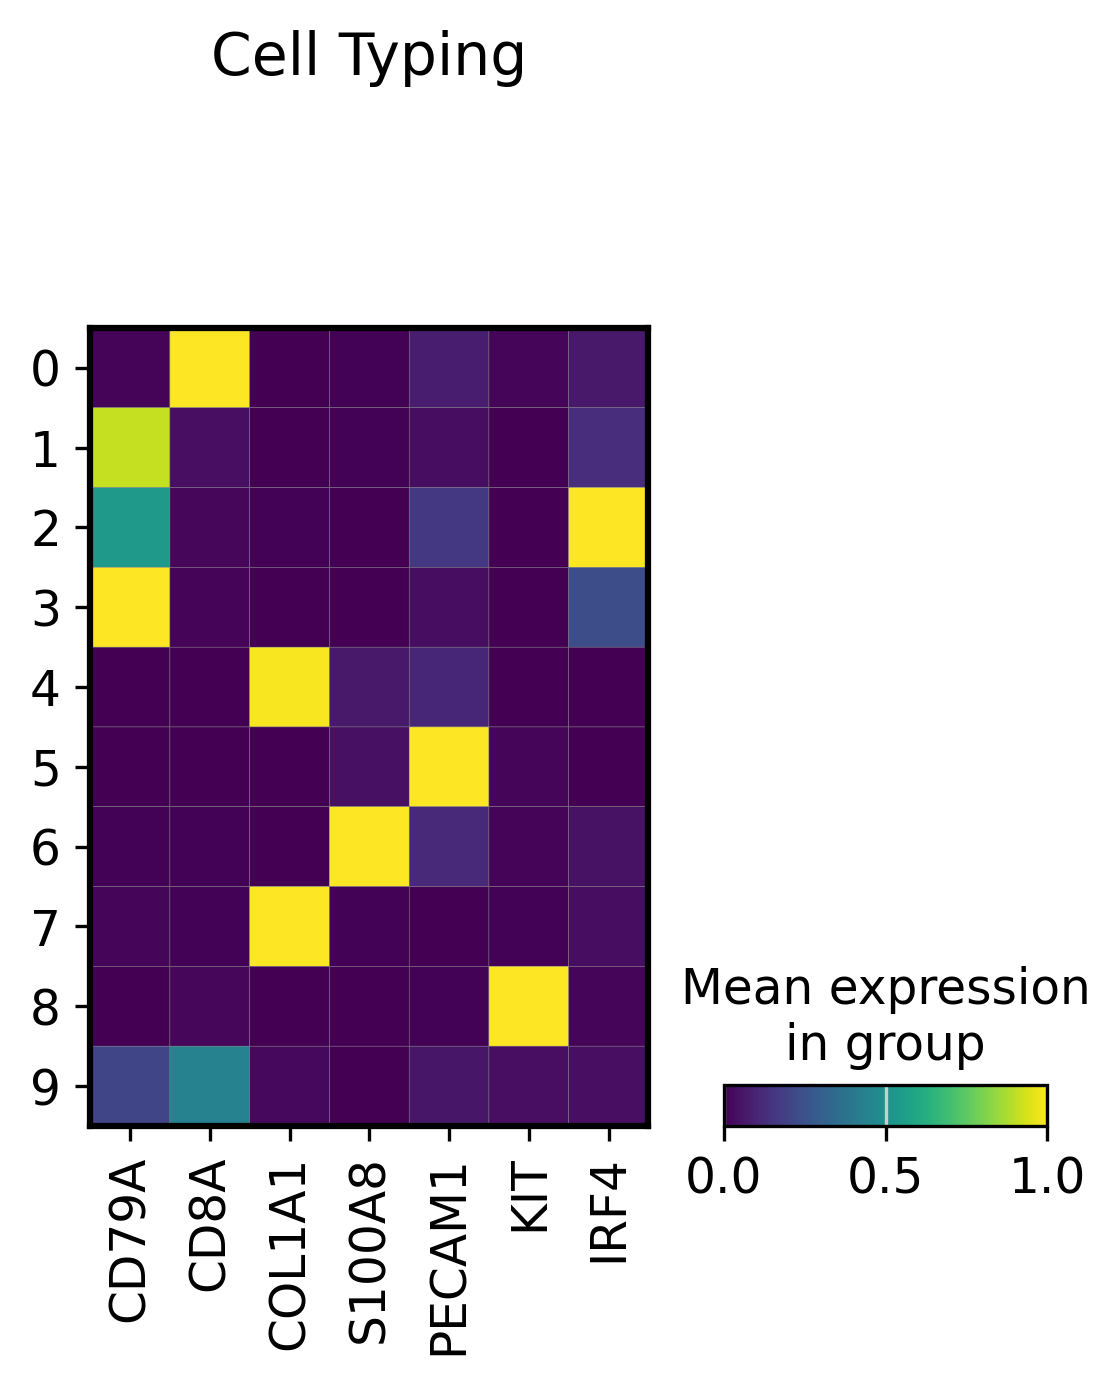

In [77]:
sc.pl.matrixplot(dat, var_names = markers, groupby = 'leiden', title = 'Cell Typing', use_raw = False, standard_scale = 'var')

In [35]:
example_celltypes = []
for x in (dat.obs['leiden']):
    if np.isin(x, ['4','5','7']):
        example_celltypes.append('Fibroblast')
    elif np.isin(x, ['2']):
        example_celltypes.append('Plasma cells')
    elif np.isin(x, ['8']):
        example_celltypes.append('Mast cells')
    elif np.isin(x, ['0']):
        example_celltypes.append('T cells')
    elif np.isin(x, ['1','3']):
        example_celltypes.append('B Cells')
    elif np.isin(x, ['6','9']):
        example_celltypes.append('Other')

dat.obs['Cell_Types'] = example_celltypes

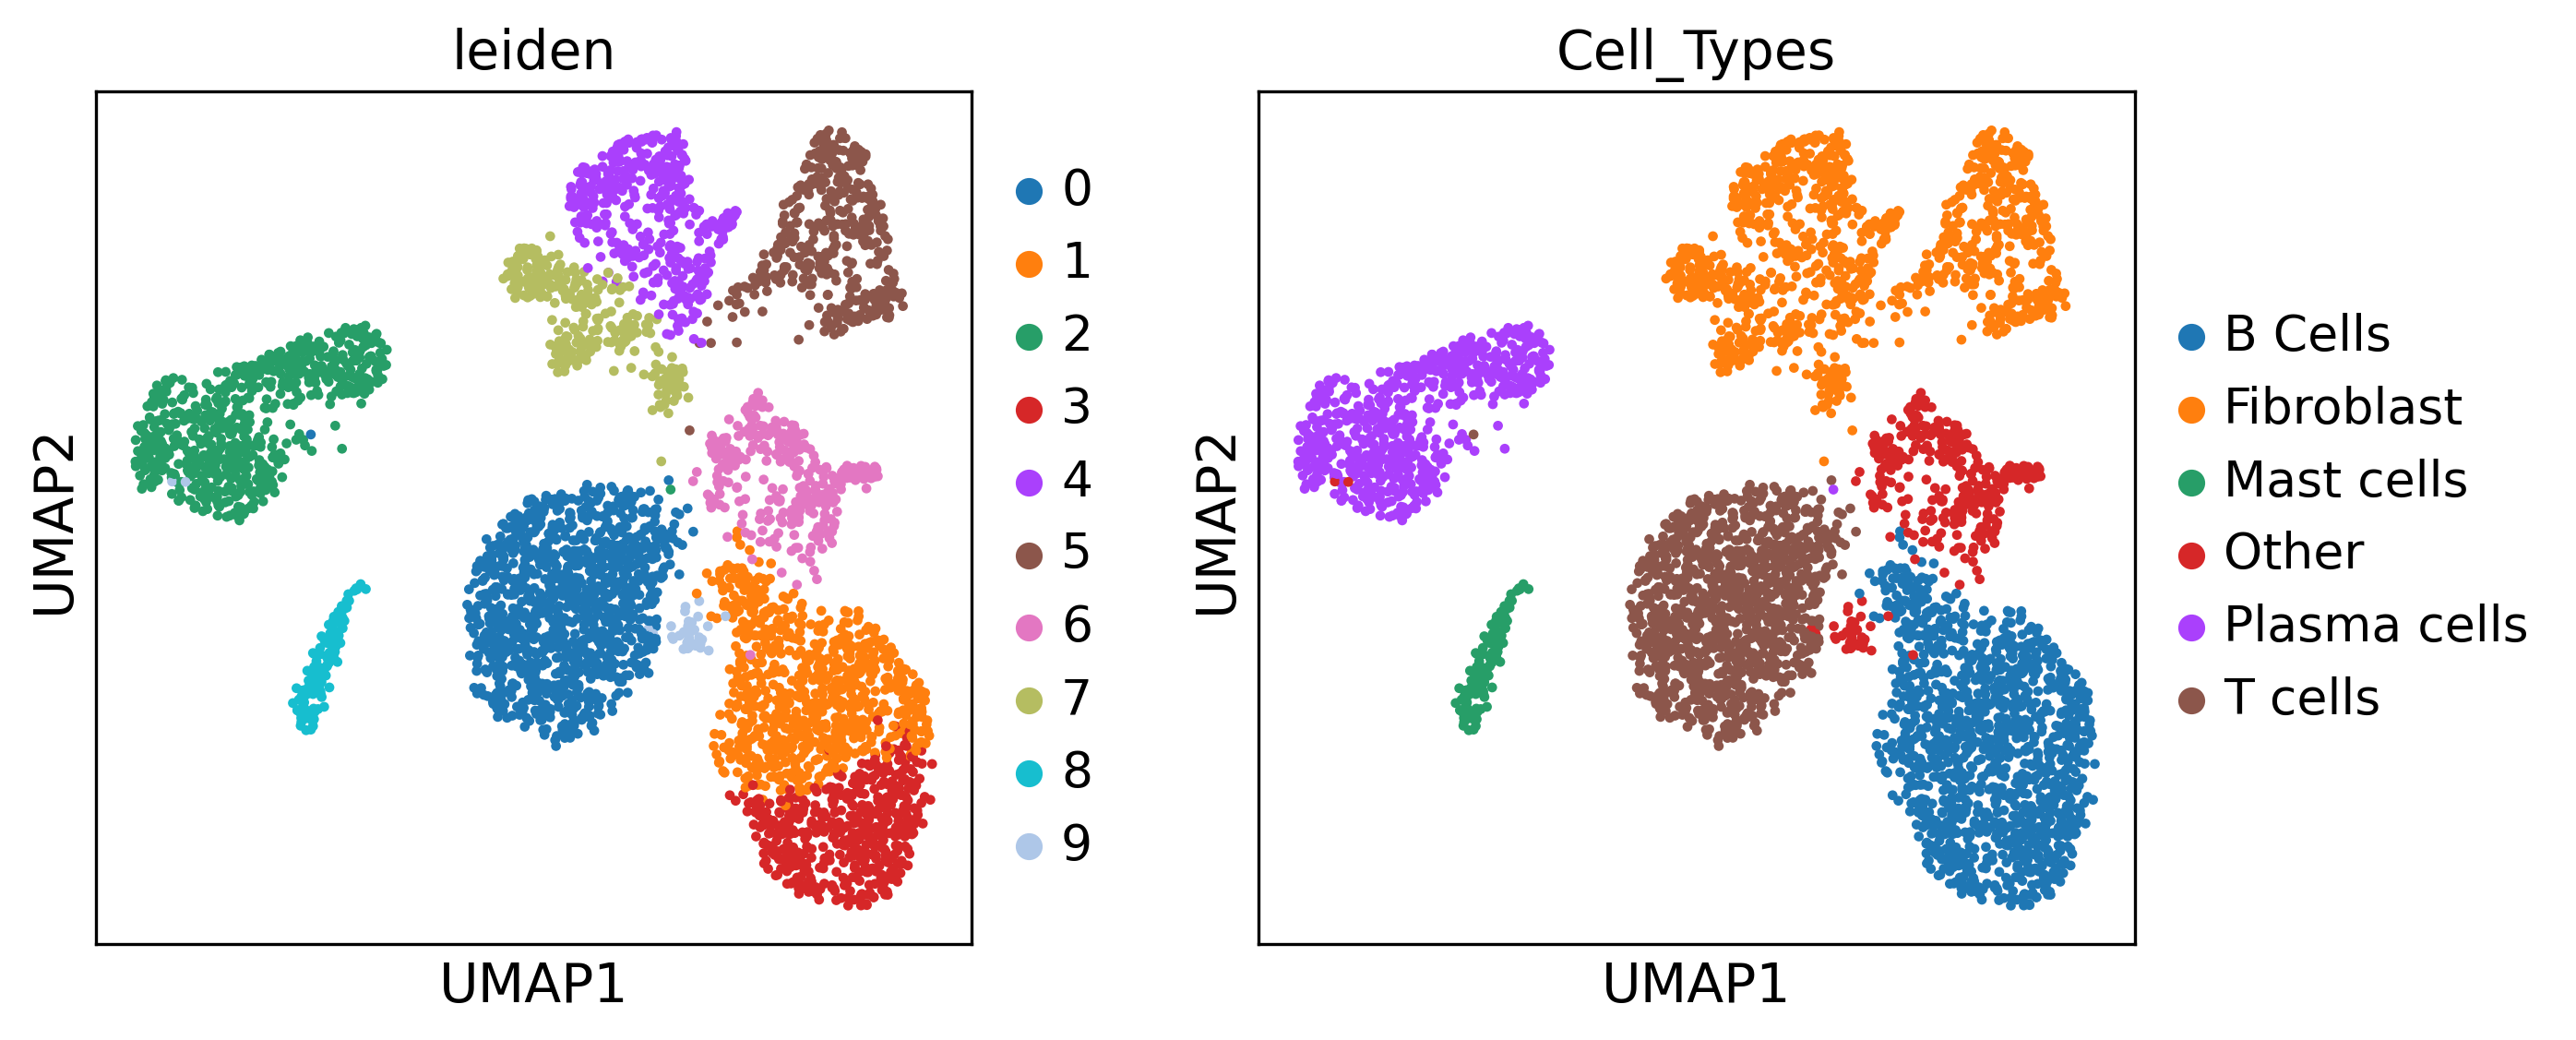

In [36]:
sc.pl.umap( dat, color = ['leiden', 'Cell_Types'])